Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None

Sample Data:
     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket

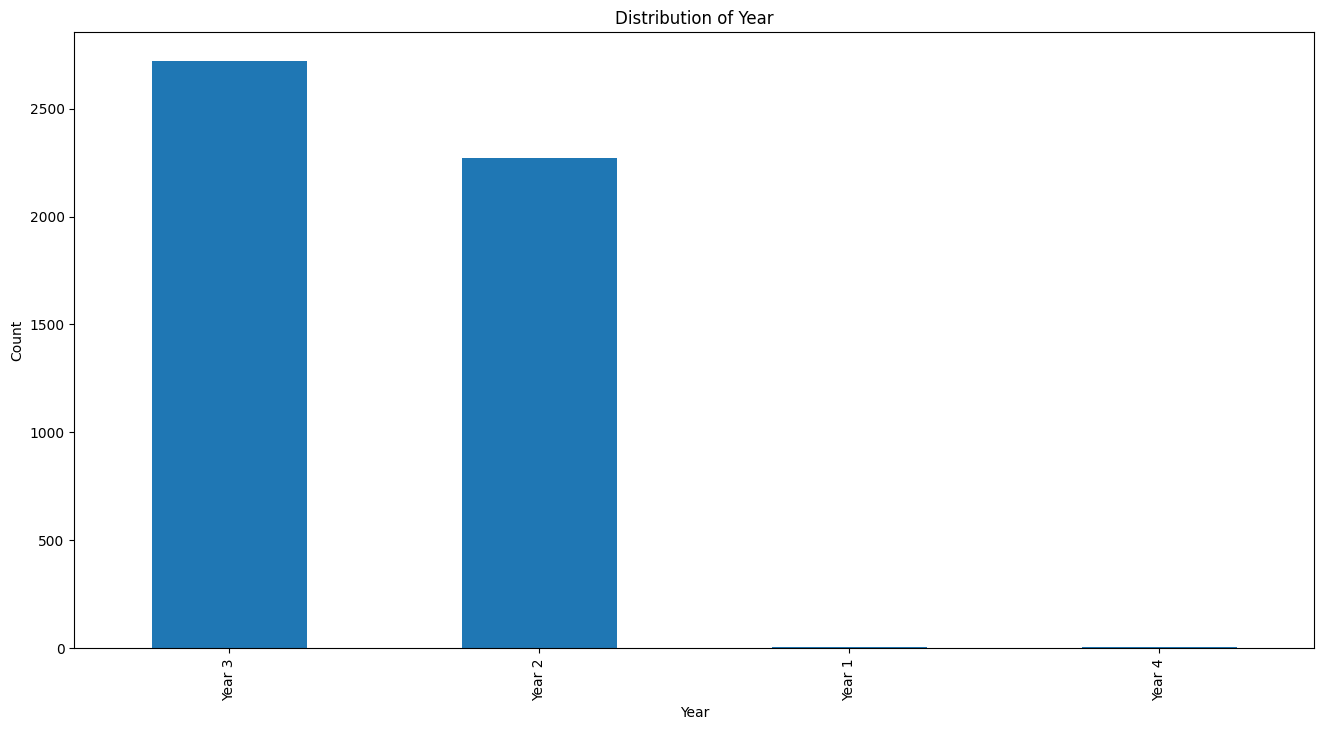

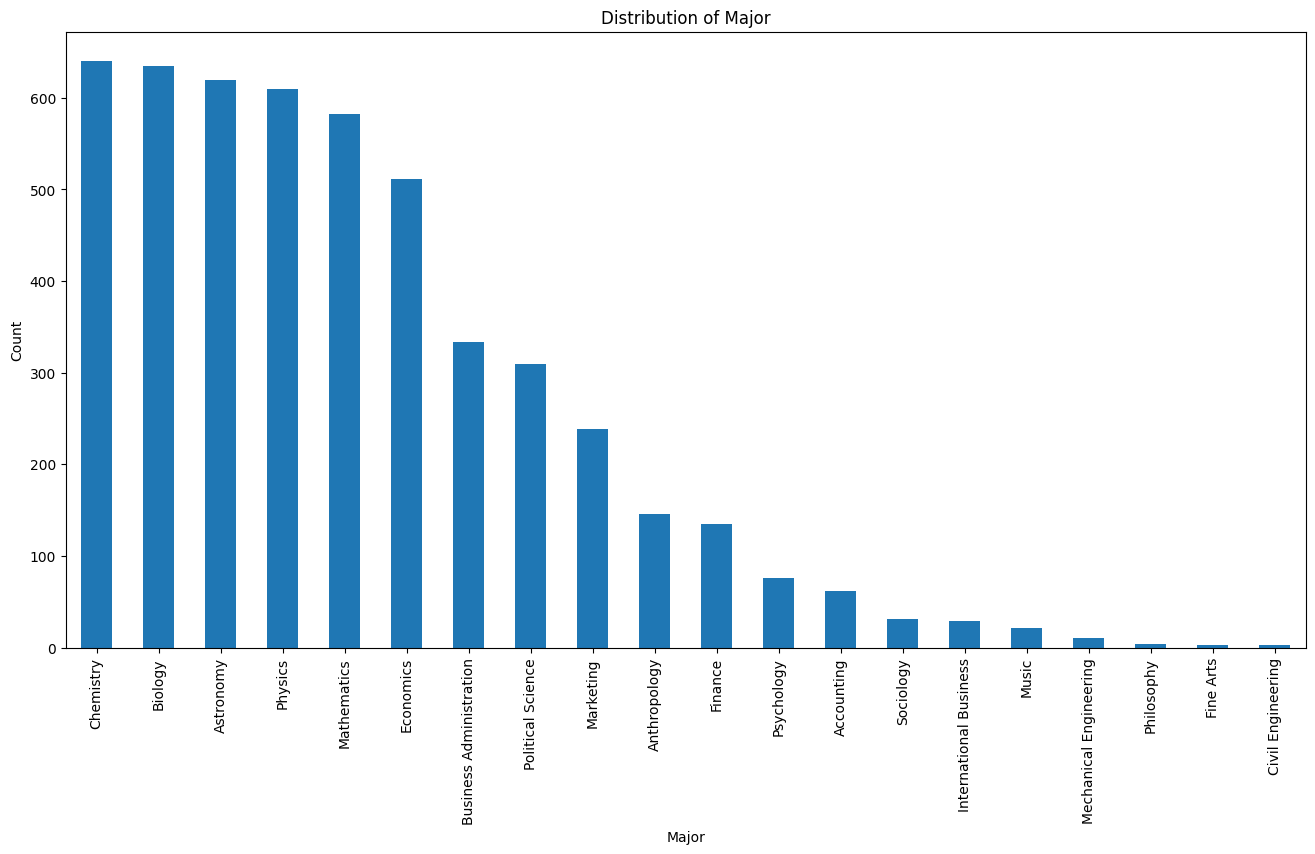

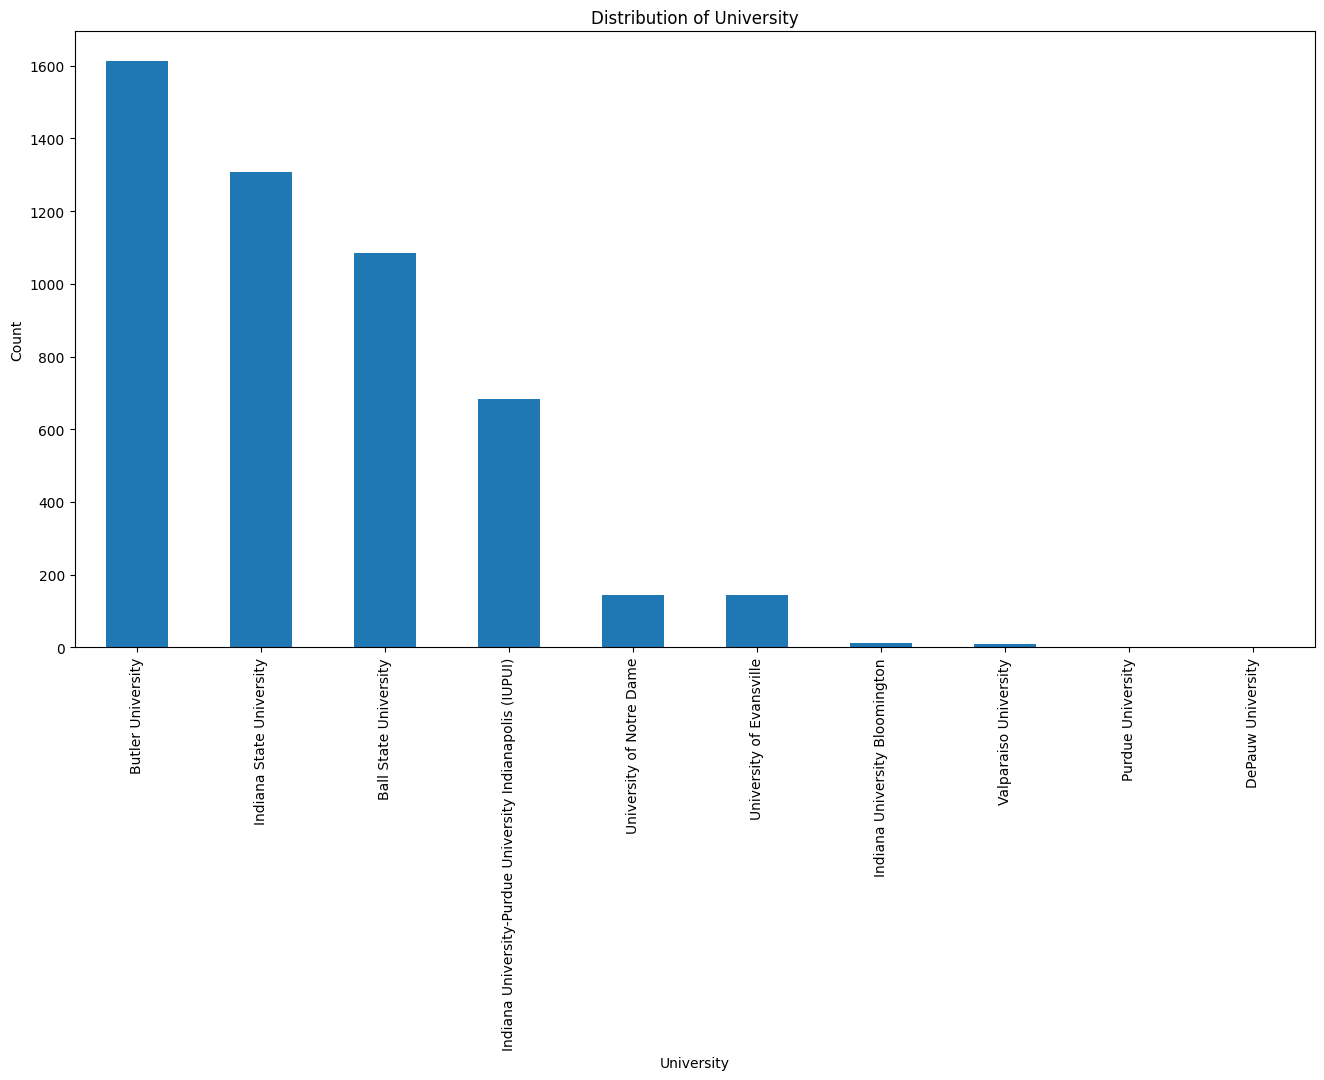

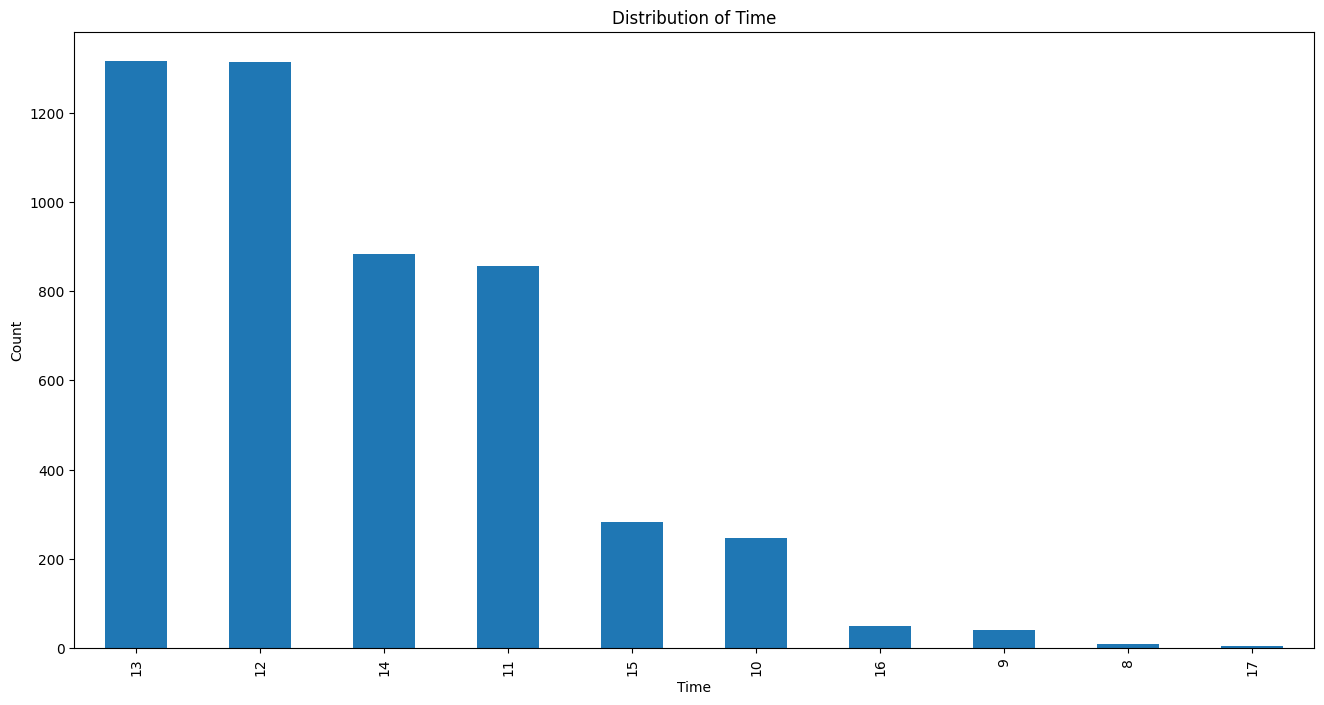

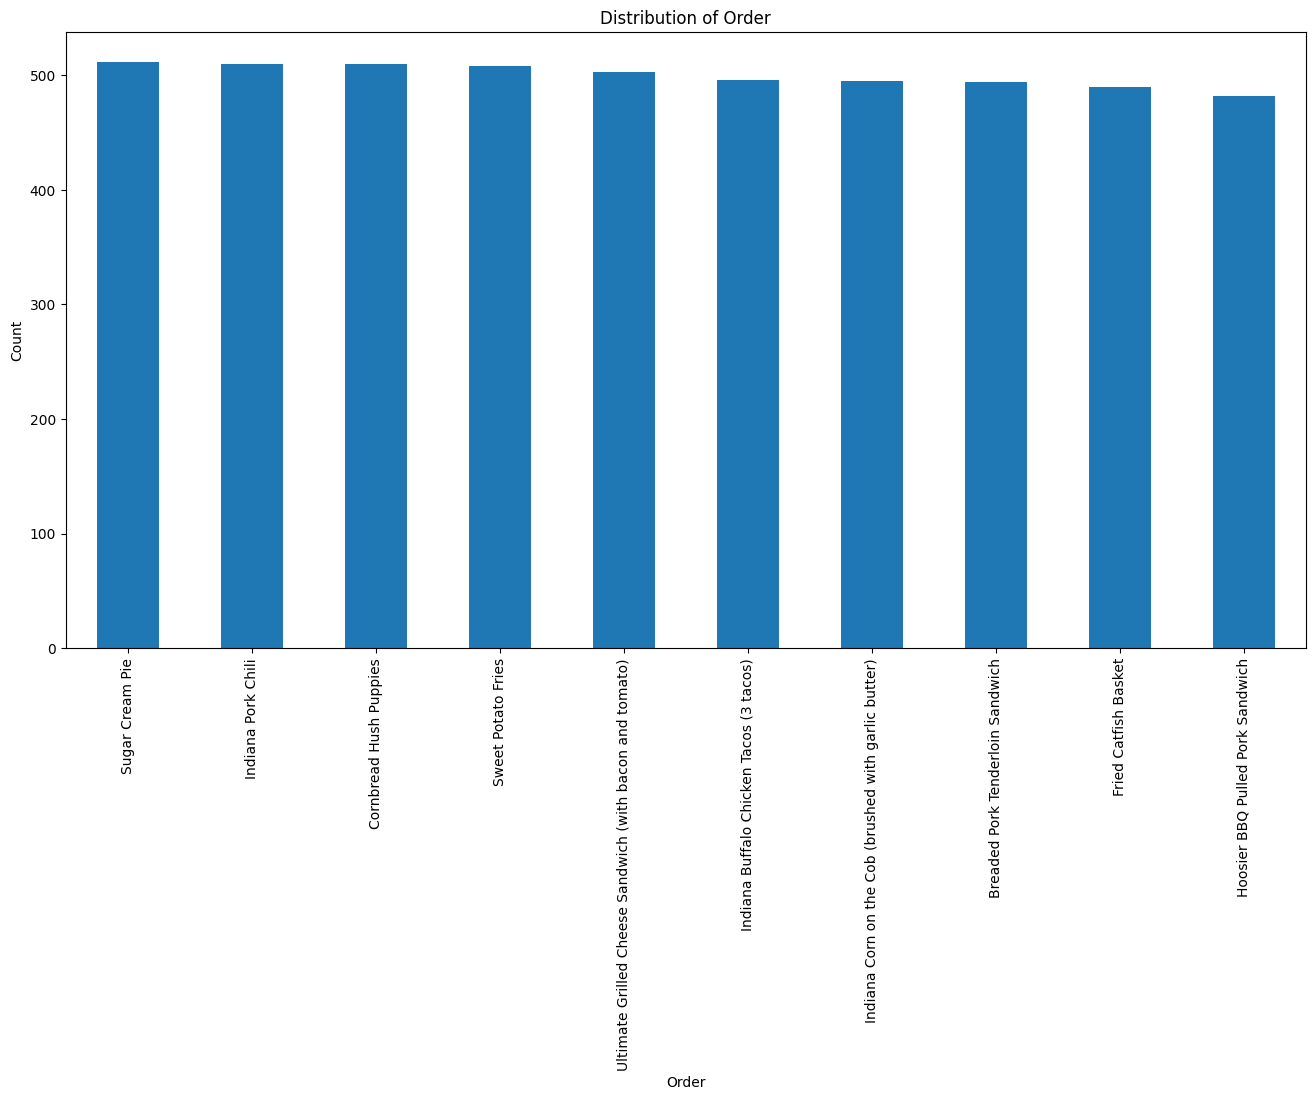

'/kaggle/working/overview_plots.zip'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/kaggle/input/xtern-dataset/TrainData.csv"
df = pd.read_csv(file_path)

print("Data Overview:")
print(df.info()) 
print("\nSample Data:")
print(df.head()) 

categorical_columns = ['Year', 'Major', 'University', 'Time', 'Order']

import os
if not os.path.exists('overview_plots'):
    os.makedirs('overview_plots')

for col in categorical_columns:
    plt.figure(figsize=(16, 8))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'overview_plots/{col}_distribution.png', facecolor='w', bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close()


shutil.make_archive("overview_plots", 'zip', ".", "overview_plots")



Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   Item        10 non-null     object
 2   Price       10 non-null     int64 
 3   Calories    10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes
None

Sample Data:
   Unnamed: 0                              Item  Price  Calories
0           0  Hoosier BBQ Pulled Pork Sandwich      8       400
1           1            Cornbread Hush Puppies      5       250
2           2  Breaded Pork Tenderloin Sandwich      9       550
3           3                Indiana Pork Chili      7       300
4           4              Fried Catfish Basket     10       600


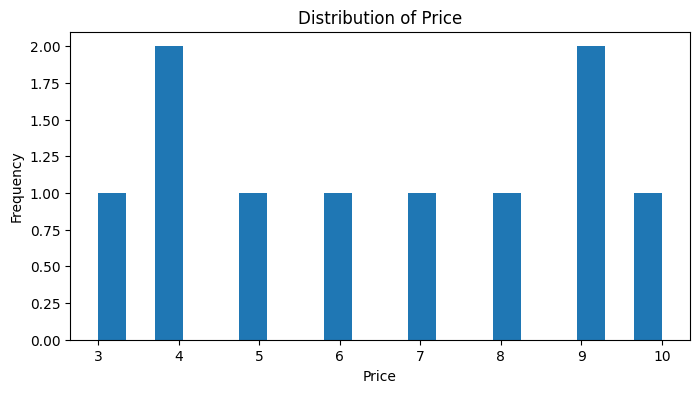

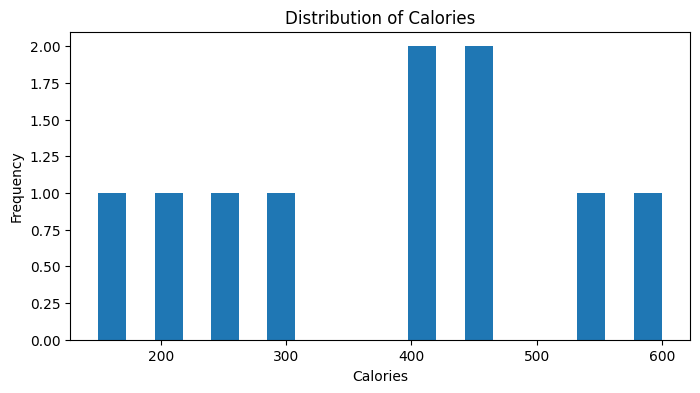

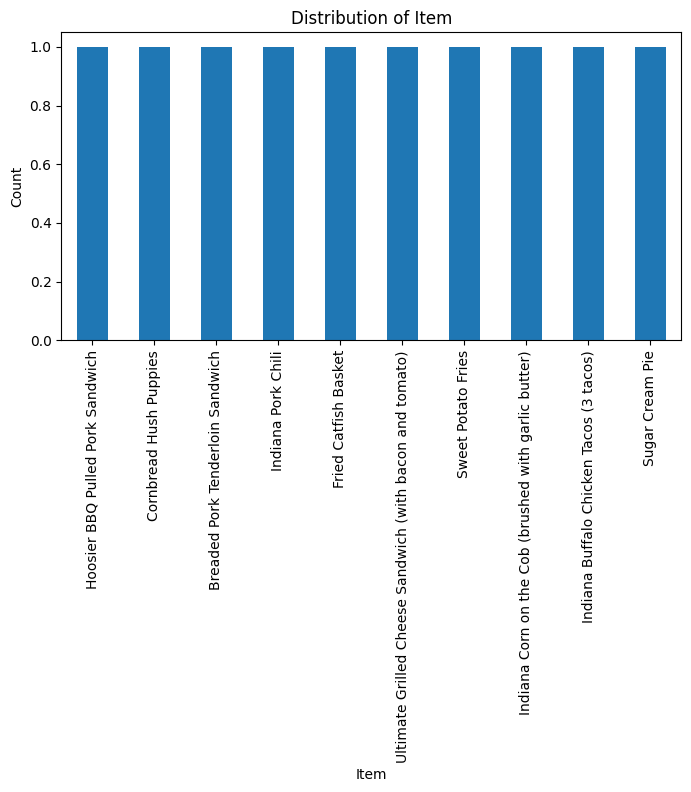

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/kaggle/input/xtern-dataset/Menu.csv"
df = pd.read_csv(file_path)

print("Data Overview:")
print(df.info())  
print("\nSample Data:")
print(df.head()) 

numerical_columns = ['Price', 'Calories']
categorical_columns = ['Item']

import os
if not os.path.exists('overview_plots'):
    os.makedirs('overview_plots')

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'overview_plots/{col}_distribution.png', facecolor='w', bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close()

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'overview_plots/{col}_distribution.png', facecolor='w', bbox_inches="tight", pad_inches=0.3)
    plt.show()
    plt.close()


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import f1_score

In [79]:
def prepare_data(file_path):
    df = pd.read_excel(file_path) 
   
    X = df[['Year', 'Major', 'University', 'Time']]
    y = df['Order']
    
    X = pd.get_dummies(X, columns=['Year', 'Major', 'University'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
    
    return X_train, X_test, y_train, y_test

In [80]:
#functions for train, test and save model
def decision_tree_model():
    model = DecisionTreeClassifier(
    criterion='gini',      
    splitter='best',        
    max_depth=None,               
    min_samples_split=2,        
    min_samples_leaf=1,         
    max_features=2,          
    random_state=100,        
    max_leaf_nodes=None,  
    class_weight="balanced",         
    ccp_alpha=0.0                
)
    return model

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def test_model(model, X_test, y_test):
    accuracy = model.score(X_test, y_test)
    return accuracy

def save_model(model, model_file):
    with open(model_file, 'wb') as file:
        pickle.dump(model, file)

In [81]:
#train model
X_train, X_test, y_train, y_test = prepare_data("/kaggle/input/xtern-dataset/DataSet.xlsx") 

model = decision_tree_model()

trained_model = train_model(model, X_train, y_train)

In [82]:
accuracy = test_model(trained_model, X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

y_pred = trained_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted') 
print(f"F1 Score: {f1:.2f}")

confidence_scores = trained_model.predict_proba(X_test) 

save_model(trained_model, "customer_order.pkl")

print(f"F1 Score: {f1:.2f}")
print("Confidence Scores:")
print(confidence_scores)


Model Accuracy: 0.66
F1 Score: 0.65
F1 Score: 0.65
Confidence Scores:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.19322393 0.        ]
 ...
 [0.         0.10735929 0.         ... 0.34188481 0.22373564 0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [1.         0.         0.         ... 0.         0.         0.        ]]


In [83]:
class CustomerOrderPredictor:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        return self.model.predict(X)

In [85]:
predictor = CustomerOrderPredictor(trained_model)

example_input = X_test.iloc[0]  

predicted_order = predictor.predict([example_input])
print(f"Predicted Customer Order: {predicted_order[0]}")

Predicted Customer Order: Indiana Buffalo Chicken Tacos (3 tacos)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
